In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy import stats

from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
insurance_df = pd.read_csv('insurance.csv')

In [3]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Q1. Do smokers have higher insurance charges than non-smokers?

H0, Null Hypothesis: 

There is no statistical significance between the cost of insurance between smokers and non-smokers.


HA, Alternate Hypothesis:

The null hypothesis is rejected as there is a significant difference in insurance costs between smokers and non-smokers.

Since there are two groups being compared, smokers and non-smokers, with numeric data, the correct test is a 2 sample t-test.

In [4]:
smoker_df = insurance_df.loc[insurance_df.smoker =='yes', ['smoker','charges']].copy()
smoker_df.head()

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768


In [5]:
#Idenifying outliers 
smoking_group = smoker_df['charges']
smoking_outliers = np.abs(stats.zscore(smoking_group)) > 3
smoking_outliers.sum()

0

In [6]:
nonsmoker_df = insurance_df.loc[insurance_df.smoker =='no', ['smoker','charges']].copy()
nonsmoker_df.head()

,smoker,charges
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520
5,no,3756.62160


In [7]:
#Idenifying outliers 
nonsmoking_group = nonsmoker_df['charges']
nonsmoking_outliers = np.abs(stats.zscore(nonsmoking_group)) > 3
nonsmoking_outliers.sum()

24

In [8]:
q1_plot_df = pd.concat([smoker_df, nonsmoker_df], axis=0).copy()

In [9]:
#Testing the Normality Assumption:

H0 = "The sample comes from a normal distribution."
HA = "The sample does not come from a normal distribution."
alpha = .05
group = smoking_group

In [10]:
ho_desc = 'No statistical significance exists. The null hypothesis was not rejected.'
ha_desc = 'A statistical significance exists. The null hypothesis is rejected as there is a significant difference in insurance costs between smokers and non-smokers.'

In [11]:
# Run the test and display the results
statistic, pvalue = stats.normaltest(group)
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was < the alpha value of {alpha}, so')
    print(ha_desc)
    print(HA)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was > the alpha value of {alpha}, so')
    print(ho_desc)
    print(H0)  

The p-value for the test was 5.564930630036463e-14
It was < the alpha value of 0.05, so
A statistical significance exists. The null hypothesis is rejected as there is a significant difference in insurance costs between smokers and non-smokers.
The sample does not come from a normal distribution.


In [12]:
#Testing the Normality Assumption:

H0 = "The sample comes from a normal distribution."
HA = "The sample does not come from a normal distribution."
alpha = .05
group = nonsmoking_group

In [13]:
# Run the test and display the results
statistic, pvalue = stats.normaltest(group)
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was < the alpha value of {alpha}, so')
    print(ha_desc)
    print(HA)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was > the alpha value of {alpha}, so')
    print(ho_desc)
    print(H0)  

The p-value for the test was 1.9193129759002216e-69
It was < the alpha value of 0.05, so
A statistical significance exists. The null hypothesis is rejected as there is a significant difference in insurance costs between smokers and non-smokers.
The sample does not come from a normal distribution.


In [14]:
len(smoking_group)

274

In [15]:
len(nonsmoking_group)

1064

We have large enough groups that we can disregard the assumption of normality

In [16]:
#Assumption of Equal Variance 
H0 = "All input samples are from populations with equal variances."
HA = "All input samples are not from populations with equal variances."
alpha = .05

In [19]:
# Run the test and display the results
statistic, pvalue = stats.levene(smoking_group, nonsmoking_group)
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was < the alpha value of {alpha}, so')
    print(ha_desc)
    print(HA)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was > the alpha value of {alpha}, so')
    print(ho_desc)
    print(H0)  

The p-value for the test was 1.5593284881803726e-66
It was < the alpha value of 0.05, so
A statistical significance exists. The null hypothesis is rejected as there is a significant difference in insurance costs between smokers and non-smokers.
All input samples are not from populations with equal variances.


This didn't pass the equal variance, so the 2 sample t-test cannot be used! We must use the Welch's T-Test.

In [20]:
H0 = 'No significant difference in insurance costs exists between smokers and non-smokers.'
HA = 'A significant difference in insurance costs exists between smokers and non-smokers.'
alpha = .05

In [21]:
# Run the test and display the results
statistic, pvalue = stats.ttest_ind(smoking_group, nonsmoking_group, equal_var=False) #double check equal_var=True/False
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was < the alpha value of {alpha}, so')
    print(ha_desc)
    print(HA)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was > the alpha value of {alpha}, so')
    print(ho_desc)
    print(H0)

The p-value for the test was 5.88946444671698e-103
It was < the alpha value of 0.05, so
A statistical significance exists. The null hypothesis is rejected as there is a significant difference in insurance costs between smokers and non-smokers.
A significant difference in insurance costs exists between smokers and non-smokers.


In [22]:
q1_plot_df

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768
...,...,...
1332,no,11411.6850
1333,no,10600.5483
1334,no,2205.9808
1335,no,1629.8335


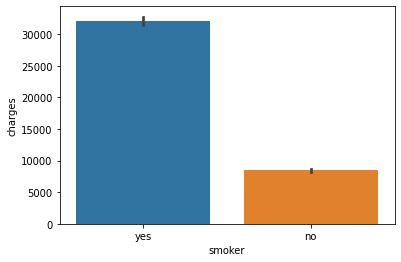

In [23]:
sns.barplot(data=q1_plot_df, x='smoker', y='charges', ci=68.2);

Q2. Are men more likely to smoke than women?

In [24]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
men_df = insurance_df.loc[insurance_df.sex =='male', ['sex','smoker']].copy()
men_df.head()

,sex,smoker
1,male,no
2,male,no
3,male,no
4,male,no
8,male,no


In [26]:
women_df = insurance_df.loc[insurance_df.sex =='female', ['sex','smoker']].copy()
women_df.head()

,sex,smoker
0,female,yes
5,female,no
6,female,no
7,female,no
9,female,no


In [27]:
q2_plot_df = pd.concat([men_df, women_df], axis=0).copy()


H0 Null Hypothesis: 
No significant difference exists in the likelihood of men than women to be smokers.

HA Alternate Hypothesis:
A significant difference exists in the likelihood of men than women to be smokers.

The datatype is catagorical where there are two groups being compared, so the correct test is a chi-squared. 

In [28]:
# calculating the contingency table with pd.cross-tab
table = pd.crosstab(insurance_df['sex'], insurance_df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [29]:
H0 = 'No significant difference exists in the likelihood of men than women to be smokers.'
HA = 'A significant difference exists in the likelihood of men than women to be smokers.'
alpha = .05

In [30]:
# Run the test and display the results
chi2, pvalue, deg_free, expected_vals = stats.chi2_contingency(table)
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was < the alpha value of {alpha}, so')
    print(ha_desc)
    print(HA)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was > the alpha value of {alpha}, so')
    print(ho_desc)
    print(H0)

The p-value for the test was 0.006548143503580696
It was < the alpha value of 0.05, so
A statistical significance exists. The null hypothesis is rejected as there is a significant difference in insurance costs between smokers and non-smokers.
A significant difference exists in the likelihood of men than women to be smokers.


In [32]:
q2_plot_df

,sex,smoker
1,male,no
2,male,no
3,male,no
4,male,no
8,male,no
...,...,...
1332,female,no
1334,female,no
1335,female,no
1336,female,no


In [33]:
grouped = q2_plot_df.groupby(['sex'], sort=False)
smoker_counts = grouped['smoker'].value_counts(normalize=True, sort=False)
smoker_data = [{'smoker': smoker, 'sex': sex, 'percentage': percentage*100} for 
    (smoker, sex), percentage in dict(smoker_counts).items()]
smoker_df = pd.DataFrame(smoker_data)

In [34]:
smoker_df

,smoker,sex,percentage
0,male,no,76.479290
1,male,yes,23.520710
2,female,no,82.628399
3,female,yes,17.371601


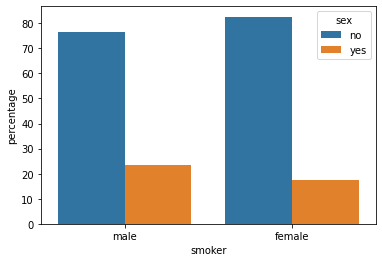

In [35]:
p = sns.barplot(x="smoker", y="percentage", hue="sex", data=smoker_df)

Q3. Do different regions have different charges, on average?

H0, Null Hypothesis:
No significant difference in charges exists between regions.

HA, Alternate Hypothesis:
A significant difference in charges exists between regions.

The datatype is numeric, there are more than 2 groups, so if parametic we use the ANOVA and/or Tukey, and it nonparametric we use the Kruskal-Wallis

In [36]:
#Outliers assumption testing 
groups = {}
for region in insurance_df['region'].unique():
    temp_df = insurance_df.loc[insurance_df['region'] == region, 'charges']
    groups[region] = temp_df
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [37]:
groups['southwest']

0       16884.92400
12       1826.84300
15       1837.23700
18      10602.38500
19      36837.46700
           ...     
1316     1731.67700
1329    10325.20600
1331    10795.93733
1332    11411.68500
1336     2007.94500
Name: charges, Length: 325, dtype: float64

In [38]:
for region, data in groups.items():
    # Calculate the number of outliers
    outliers = np.abs(stats.zscore(data)) > 3
    print(f"{outliers.sum()} outliers were removed from the {region} group.")
    # Remove the outliers
    groups[region] = data.loc[~outliers]

8 outliers were removed from the southwest group.
2 outliers were removed from the southeast group.
7 outliers were removed from the northwest group.
4 outliers were removed from the northeast group.


Outliers have been removed, so outliers assumption has been satisfied!

In [39]:
#Assemption of normality
# Loop through the groups and obtain
# group count and the pvalue of the Normal Test
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    norm_results[i] = {'n': len(data),
                       'p':p}

In [40]:
# Display a dataframe created from the norm_results dictonary and transpose it 
pd.DataFrame(norm_results).T

,n,p
southwest,317.0,7.728611e-22
southeast,362.0,1.936990e-13
northwest,318.0,2.940543e-19
northeast,320.0,3.557877e-17


In [41]:
# Create and display a dataframe created from the norm_results dictonary and transpose it 
norm_results_df = pd.DataFrame(norm_results).T
# Add a column to indicate if the group pvalue was significant or not
norm_results_df['sig?'] = norm_results_df['p'] < .05

In [42]:
# Display the dataframe
norm_results_df

,n,p,sig?
southwest,317.0,7.728611e-22,True
southeast,362.0,1.936990e-13,True
northwest,318.0,2.940543e-19,True
northeast,320.0,3.557877e-17,True


Since there is a large sample size in each group we can safely disregard the assumption of normality, even though the groups do not come from a normal distributions.

In [43]:
#Assumption of Equal Variance testing 

H0 = "All input samples are from populations with equal variances."
HA = "All input samples are not from populations with equal variances."
alpha = .05

In [44]:
# Run the test and display the results
statistic, pvalue = stats.levene(*groups.values())
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was < the alpha value of {alpha}, so')
    print(ha_desc)
    print(HA)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was > the alpha value of {alpha}, so')
    print(ho_desc)
    print(H0) 

The p-value for the test was 3.2035503711783993e-06
It was < the alpha value of 0.05, so
A statistical significance exists. The null hypothesis is rejected as there is a significant difference in insurance costs between smokers and non-smokers.
All input samples are not from populations with equal variances.


The groups did not satisfy the Assumption for Variance, so we will not run the One-Way ANOVA test, we will use the Kruskal Test

In [45]:
H0 = 'No significant difference in charges exists between regions.'
HA = 'A significant difference in charges exists between regions.'
alpha = .05

In [46]:
# Run the test and display the results
statistic, pvalue = stats.kruskal(*groups.values())
if pvalue < alpha:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was < the alpha value of {alpha}, so')
    print(ha_desc)
    print(HA)
else:
    print(f'The p-value for the test was {pvalue}')
    print(f'It was > the alpha value of {alpha}, so')
    print(ho_desc)
    print(H0)

The p-value for the test was 0.07468847911322242
It was > the alpha value of 0.05, so
No statistical significance exists. The null hypothesis was not rejected.
No significant difference in charges exists between regions.


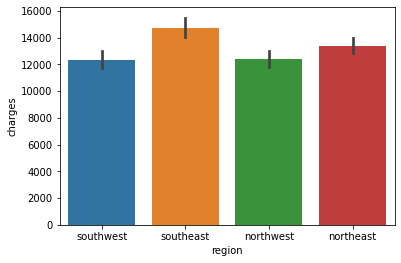

In [48]:
sns.barplot(data=insurance_df, x='region', y='charges', ci=68);